
# <font color='red'><center> Deep Learning: Convolution Neural Network(CNN) </center> </font>

## Convolution Layer

- The most important building bloc in CNN.
- Unlike to the fully connected layer, the neurons in the first convolution layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields
- Each neuron in the second convolution layer is connected to neurons located within a small rectangle in the first layer.
- This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer and so on.
- This architecture is common in real-world images, which is one of the reason why CNN work so well for image recognition. 
<center><img src="../assets/CNN.png" width="600"></center>

<center><img src="../assets/input_neurons.png" width="250"></center>
<center><img src="../assets/connection.png" width="300"></center>
<center><img src="../assets/connections_1.png" width="300"></center>
<center><img src="../assets/connection_2.png" width="300"></center>

- One fundamental idea to mention is, all neurons share the same weights and bias (e.g. 5x5). This means that all the neurons in the hidden layer extract the same features but at different location.
- We can note that the CNN is well adapted to the translation invariance of images.
- The map from the input layer to the hidden layer is called a `feature map.`
- Weights and bias form a `kernel/filter`.


- To get the same height and width of two scuccessive layers, it is common to use the zero padding.
<center><img src="../assets/padding.png" width="400"></center>





More details here:
- http://neuralnetworksanddeeplearning.com/chap6.html#introducing_convolutional_networks 
- https://cs231n.github.io/convolutional-networks/

In the images above, the network is able to detect only one kind of features (e.g. edge, texture,...).To do image recognition, we need more than one feature map.

<center><img src="../assets/filters.png" width="400"></center>
<center><img src="../assets/stack_filters.png" width="400"></center>


## Pooling layer:

- The goal of pooling layer is to subsample the input image in order to reduce the computational load, the memory usage and the number of parameters. It can limit the risk of overfitting.
- It is like in a convolution layer, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer.
- Pooling layer has size, stride and padding type.
- Pooling layer does not have weights. It just an aggregation function such as max, mean.
<center><img src="../assets/pooling_layer.png" width="400"></center>

- In addition to afrementioned adavantages, pooling layer introduces some level of invariance to small translations.
<center><img src="../assets/max_pool.png" width="400"></center>


### Typical CNN architecture
<center><img src="../assets/CNN_arch.png" width="500"></center>


#### LeNet-5 architecture
It is the most popular net developed by Yann Lecun in 1998.
<center><img src="../assets/LeNet.png" width="500"></center>


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D, Dense, Flatten, InputLayer, UpSampling2D, BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam, RMSprop

In [23]:
def get_LeNet(input_shape=(28,28,1)):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
        AvgPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
        AvgPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),
        Flatten(),
        Dense(units=84, activation='tanh'),
        Dense(units=10, activation='softmax')
        
    ])
    return model

In [24]:
# Load the data set from keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# expand dimension

X_train_full = np.expand_dims(X_train_full, -1)
X_test = np.expand_dims(X_test, -1)
print("Train data shape :", X_train_full.shape)
print("Test data shape :", X_test.shape)
print("Dtype of images:",X_train_full.dtype )

# split the X_train_full into train and valid and normalize the data simply in [0,1]
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# class name of first sample in the training set
class_names[y_train[0]] 

Train data shape : (60000, 28, 28, 1)
Test data shape : (10000, 28, 28, 1)
Dtype of images: uint8


'Coat'

In [25]:
model = get_LeNet() 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)               

In [26]:
model.compile(loss="sparse_categorical_crossentropy", # we don't need to convert labels to one hot encoding. 
              optimizer="sgd", # stochastic gradient descent optimizer.
              metrics=["accuracy"] # accuracy metric  for classification
             )

In [27]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7191 - accuracy: 0.7472 - val_loss: 0.5192 - val_accuracy: 0.8144
Epoch 2/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4882 - accuracy: 0.8246 - val_loss: 0.4549 - val_accuracy: 0.8302
Epoch 3/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4327 - accuracy: 0.8465 - val_loss: 0.3992 - val_accuracy: 0.8600
Epoch 4/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4024 - accuracy: 0.8555 - val_loss: 0.3896 - val_accuracy: 0.8588
Epoch 5/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3812 - accuracy: 0.8635 - val_loss: 0.3632 - val_accuracy: 0.8702
Epoch 6/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3647 - accuracy: 0.8693 - val_loss: 0.3555 - val_accuracy: 0.8700
Epoch 7/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3508 - accuracy: 0.8743 - val_loss: 0.3463 -

#### AlexNet
Won the 2012 ImageNet challenge by large margin. It achieved 17% top-5 error rate while the second best achieved only 26%. It is quiet similar to LeNet, only much alrger and deeper and it
was the first to stack convolutional layers directly on top of each other, instead of
stacking a pooling layer on top of each convolutional layer.


<center><img src="../assets/AlexNet.png" width="500"></center>

In [28]:
from functools import partial
DefaultConv2D = partial(Conv2D, activation='relu')
def get_alexNet():
    model = Sequential([
        tf.keras.layers.experimental.preprocessing.Resizing(
    height=227, width=227, interpolation='bilinear',  input_shape=[None,None,3]),
        DefaultConv2D(filters=96, kernel_size=11, strides=4, padding='valid'),
        MaxPool2D(pool_size=3, strides=2, padding='valid'),
        DefaultConv2D(filters=256, kernel_size=5, strides=1, padding='same'),
        MaxPool2D(pool_size=3, strides=2, padding='valid'),
        
        DefaultConv2D(filters=256, kernel_size=3, strides=1, padding='same'),
        DefaultConv2D(filters=256, kernel_size=3, strides=1, padding='same'),
        DefaultConv2D(filters=256, kernel_size=3, strides=1, padding='same'),
        
        Flatten(),
        Dense(units=4096, activation='relu'),
        Dense(units=4096, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    return model

In [29]:
alexnet_model = get_alexNet()
alexnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 256)      

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data

(X_train, y_train), (X_test, y_test) = load_data()
# split the X_train_full into train and valid and normalize the data simply in [0,1]
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
print(X_train.shape)
print(X_test.shape)

(45000, 32, 32, 3)
(10000, 32, 32, 3)


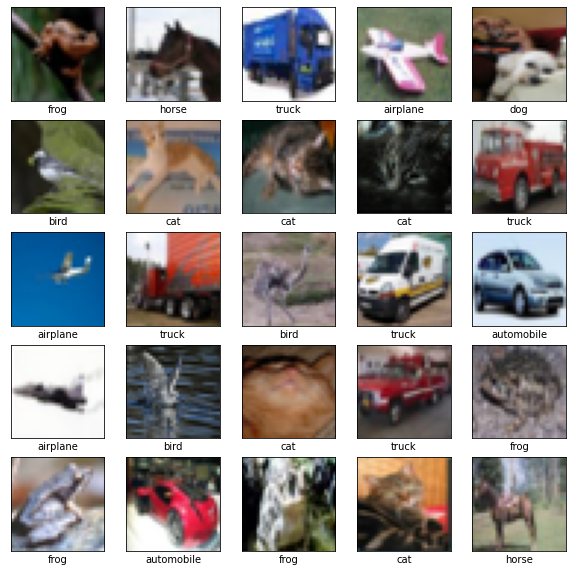

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


- we have to resize/padding the images to get the input_shape.
- we can operate on the images before feeding it to the network or add the resize layer as a part of the model.

`tf.keras.layers.experimental.preprocessing.Resizing(
    height, width, interpolation='bilinear', name=None, **kwargs
)
`

In [ ]:
alexnet_model.compile(loss="sparse_categorical_crossentropy", # we don't need to convert labels to one hot encoding. 
              optimizer="sgd", # stochastic gradient descent optimizer.
              metrics=["accuracy"] # accuracy metric  for classification
             )

In [ ]:
history = alexnet_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=32)

#### Data augmentation using keras DataGenerator
Keras provide a DataGenerator tools to implement the data augmentation for image classification. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [ ]:

# fits the model on batches with real-time data augmentation:
alexnet_model.fit(datagen.flow(X_train, y_train, batch_size=32),
          steps_per_epoch=len(X_train) / 32, epochs=2)

### GoogleNet
- It was Developed by Christian Szegedy et al. from Google Research.
- It won the ImageNet challenge on 2014 by pushing the top-5 error rate below 7%.
- The great performance comes in large part from the fact that the network was much deeper than previous network.
- It used a special subnetwork called `inception` which allows it to use parameters much more efficiently.
- GoogleNet has 10x fewer parameters than AlextNet.
<center><img src="../assets/inception_block.png" width="500"></center>

- Inception module use 1x1 convolution. This surely cannot capture any features since they look at only one pixel at a time. In fact, these lauers serve three purposes:
    - They capture pattern along the depths
    - They are configured to output fewer features maps, so that they serve as a bottekneck layers (reduce dimensionality). That is why GoogleNet has fewer parameters
    - Each pair of convolution layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) acts like a single pwerful conv layer able to capture more complex features.

There are numerous other architectures such as ResNet, VGG, SENet,... For more details see Chapter 14.

## Semantic segmentation

In `Semantic segmentation` each pixel is classified according to the class of the object it belongs to.
<center><img src="../assets/semantic.png" width="500"></center>
- Semantic segmentation is often resolved by a Fully convolution Network (FCN), which composed of encoder and decoder.
<center><img src="../assets/FCN.png" width="500"></center>


## Transfer Learning

- **Transfer learning** consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to identify Tanuki.  
- Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.
- The most common incarnation of transfer learning in the context of deep learning is the following worfklow:

    - Take layers from a previously trained model.
    - Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
    - Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
    - Train the new layers on your dataset.

- A last, optional step, is `fine-tuning`, which consists of unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate

See https://keras.io/guides/transfer_learning/


### Image Colorize

 - We will tackle a problem of image colorize: `Input: grayscale image, Output: RGB image.`
 - We will use a fully convolution architecture encoder-decoder
 - For the encoder, we will use the pretrained model VGG16.
 - For the decoder, we will use a custom decoder.
 
 <center><img src="../assets/FCN_colorize.png" width="700"></center>
 - The idea is to use the LAB color system that completely separates the lightness from color.
 - We can see the lightness as some sort of grayscale image, it only has luminosity but, no colors at all.
 - channel `L` is responsible for that lightness (grayscale) and the other two channels `ab` are responsible for color.
  <center><img src="../assets/lab.png" width="700"></center>
  - We can see that it is too hard to understand the content of the picture without looking into L. This is because 94% of the cells in our eyes determine Lightness (L), and only 6% of our receptors  act as sensors for colors.
  - The goal is to train the network in order to map the channel L into the channels `ab`.

In [3]:
def image_colorize_model():
    model = Sequential()
    # add encoder part
    vggmodel = tf.keras.applications.vgg16.VGG16(weights='imagenet')
    num = 0
    for i, layer in enumerate(vggmodel.layers):
        if i<19:
            model.add(layer)
            if isinstance(layer, Conv2D):
                model.add(BatchNormalization())
    # free the VGG layer
    for layer in model.layers:
        layer.trainable=False
    
    #Decoder
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
    model.add(UpSampling2D((2, 2)))
    return model
        

In [4]:
Colorizer = image_colorize_model()
Colorizer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 128)     5

In [11]:
# dataset class
# Here we define custom Data Generator
import cv2
import skimage.io
import numpy as np
from tensorflow.keras.utils import Sequence
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb

class ColorData(Sequence):
    def __init__(self, images_paths, batch_size=16,
                 target_dim=(224, 224),
                 shuffle=False):
        self.images_paths = images_paths
        self.target_dim = target_dim
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
    def __len__(self):
        return int(np.ceil(len(self.images_paths) / self.batch_size))
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.images_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)
            
    def __getitem__(self, index):
        indexes = self.indexes[
                  index * self.batch_size: (index + 1) * self.batch_size]
        X = np.array([np.stack((self.get_L_ab_channel(self.images_paths[k])[:, :, 0],)*3, axis=-1) for k in indexes])
        y = np.array([self.get_L_ab_channel(self.images_paths[k])[:, :, 1:]/128. for k in indexes])
        return X, y
    
    def get_L_ab_channel(self, path):
        image = cv2.resize(skimage.io.imread(path),
                           dsize=(self.target_dim[1],self.target_dim[0]),
                    interpolation=cv2.INTER_CUBIC)
        
        if image.ndim!=3:
            raise ValueError("Error grayscale image")
        
        image = image/255.
        lab = rgb2lab(image)
        
        return lab


In [13]:
# path data set
import glob
import os
path_data = '../SUN_dataset/'
train_data = glob.glob(os.path.join(path_data,'train/', '*.jpg'))
valid_data = glob.glob(os.path.join(path_data,'valid/', '*.jpg'))

print("Train_data shape :", len(train_data))
print("valid_data shape :", len(valid_data))

train_dataset = ColorData(images_paths=train_data)
valid_dataset = ColorData(images_paths=valid_data)

# checking the range value of x and y

for i, (x, y) in enumerate(train_dataset):
    print(x.shape, y.shape)
    print(x.min(), x.max(), " -- ", y.min(), y.max())
    if i==2:
        break


Train_data shape : 623
valid_data shape : 92
(16, 224, 224, 3) (16, 224, 224, 2)
0.0 100.0  --  -0.4889418625737473 0.6256665575442913
(16, 224, 224, 3) (16, 224, 224, 2)
0.0 100.0  --  -0.7063911937477714 0.6725081350551142
(16, 224, 224, 3) (16, 224, 224, 2)
0.0 100.0  --  -0.5937736090143413 0.6929765246072276


In [ ]:
# Colorizer_ = tf.keras.models.load_model('Colorizer')
Colorizer.compile(optimizer=RMSprop(1e-3), loss='mse')
history = Colorizer.fit(x=train_dataset, validation_data=valid_dataset, epochs=10)
Colorizer.save("Colorizer")

Epoch 1/10
39/39 [==============================] - 30s 774ms/step - loss: 0.0104 - val_loss: 0.0131
Epoch 2/10
39/39 [==============================] - 32s 811ms/step - loss: 0.0086 - val_loss: 0.0123
Epoch 3/10
 5/39 [==>...........................] - ETA: 16s - loss: 0.0100

In [32]:
## postprocessing
def run_test(model, image):
    lab = rgb2lab(image/255.)
    l = lab[:,:,0]
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    ab = model.predict(L)
    ab = ab*128
    color_img = np.zeros((224, 224, 3))
    color_img[:,:,0] = l
    color_img[:,:,1:] = ab
    return lab2rgb(color_img), l

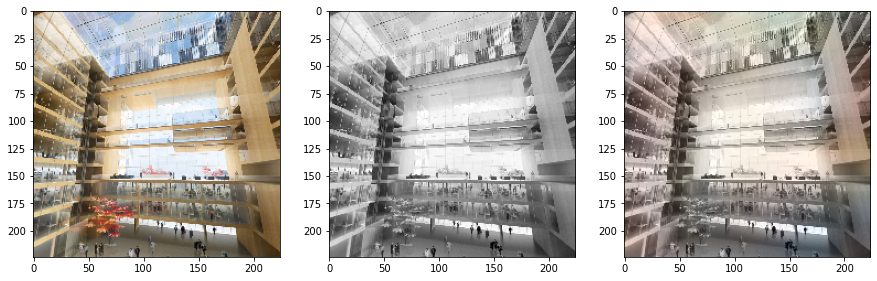

In [41]:
path = valid_data[50]    
image = cv2.resize(skimage.io.imread(path),
                           dsize=(224, 224),
                    interpolation=cv2.INTER_CUBIC)

color_img, l = run_test(Colorizer,image)
f, axarr = plt.subplots(1,3)
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(image)
axarr[1].imshow(l, cmap='gray')
axarr[2].imshow(color_img)